In [1]:
print('Ritu')

Ritu


In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   25320 non-null  object 
 2   author  23540 non-null  object 
 3   text    25954 non-null  object 
 4   label   20800 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1015.8+ KB


In [10]:
df.shape

(26000, 5)

In [12]:
df.isnull().sum()/len(df)*100

,0
id,0.000000
title,2.615385
author,9.461538
text,0.176923
label,20.000000


In [13]:
df.isna().sum()

,0
id,0
title,680
author,2460
text,46
label,5200


In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(18285, 5)

In [16]:
X = df.drop('label',axis = 1)
y = df['label']

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
corpus = []
ps = PorterStemmer()
for title in X['title']:
   corpus.append(' '.join([ps.stem(word) for word in re.sub('[^a-zA-Z]',' ',title).lower().split() if word not in stopwords.words('english')]) )
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [24]:
vocap_size = 5000

In [25]:
onehotData = [one_hot(word,vocap_size) for word in corpus]

In [26]:
onehotData

[[151, 4552, 1088, 773, 2946, 3470, 202, 739, 130, 4357],
 [3535, 1109, 2885, 1388, 4465, 4670, 46],
 [791, 2438, 4891, 2058],
 [2987, 3787, 3947, 372, 3940, 3842],
 [712, 4465, 1062, 1674, 4061, 4147, 4465, 3769, 4613, 2101],
 [44,
  2116,
  201,
  2466,
  1330,
  1936,
  3771,
  4750,
  2479,
  2307,
  3008,
  1958,
  4095,
  54,
  46],
 [4001, 2965, 106, 3596, 4827, 4518, 1325, 4145, 532, 2476, 4371],
 [3103, 4534, 853, 2332, 853, 3195, 1936, 3760, 532, 2476, 4371],
 [231, 4120, 4972, 719, 33, 2427, 1376, 4752, 1936, 3768],
 [4033, 4162, 1527, 1060, 394, 701, 2935, 1668],
 [1822, 3210, 4756, 3420, 609, 1309, 4456, 3227, 260, 3406, 2446],
 [372, 912, 2946, 2427, 1936, 853],
 [1392, 4667, 2516, 3942, 3007, 3157, 1353, 4737, 4778],
 [1224, 2977, 4288, 4219, 1856, 1857, 387, 532, 2476, 4371],
 [4876, 3581, 3689, 4984, 1859, 532, 2476, 4371],
 [1659, 136, 2518, 1423, 3169, 35, 368, 2515, 1611, 2203],
 [4184, 1699, 1109],
 [4509, 3516, 4207, 4124, 1936, 2042, 3690, 46],
 [3249, 3617, 2885

In [28]:
maxlength = max([len(word) for word in onehotData])
maxlength

47

In [29]:
paddedData  = pad_sequences(onehotData,maxlen = maxlength,padding = 'pre')
paddedData

array([[   0,    0,    0, ...,  739,  130, 4357],
       [   0,    0,    0, ..., 4465, 4670,   46],
       [   0,    0,    0, ..., 2438, 4891, 2058],
       ...,
       [   0,    0,    0, ...,  532, 2476, 4371],
       [   0,    0,    0, ...,  217, 3759, 4299],
       [   0,    0,    0, ..., 1418, 3096, 1892]], dtype=int32)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(paddedData,y,test_size = 0.23,random_state = 32001)

In [50]:
earlyStop = EarlyStopping(monitor = 'val_loss',
                          patience = 4,
                          min_delta = 0.001,
                          verbose = 1)

In [60]:
features = 40
model = Sequential([
    Embedding(vocap_size,features,input_length = maxlength),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
# history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 10,callbacks = earlyStop)
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


440/440 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8163 - loss: 0.3729 - val_accuracy: 0.9125 - val_loss: 0.1908
Epoch 2/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9444 - loss: 0.1434 - val_accuracy: 0.9130 - val_loss: 0.1918
Epoch 3/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9669 - loss: 0.0990 - val_accuracy: 0.9170 - val_loss: 0.2096
Epoch 4/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9744 - loss: 0.0690 - val_accuracy: 0.9168 - val_loss: 0.2408
Epoch 5/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9821 - loss: 0.0522 - val_accuracy: 0.8947 - val_loss: 0.3282
Epoch 6/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9877 - loss: 0.0412 - val_accuracy: 0.9099 - val_loss: 0.3196
Epoch 7/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9935 - loss: 0.0235 - val_accuracy: 0.9087 - val_loss: 0.3526
Epoch 8/10
440/440 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9951 - loss: 0.0194 - val_accuracy: 0.9132 

In [62]:
y_pred = np.where(model.predict(X_test)> 0.5,1,0)
y_pred


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

<Axes: >

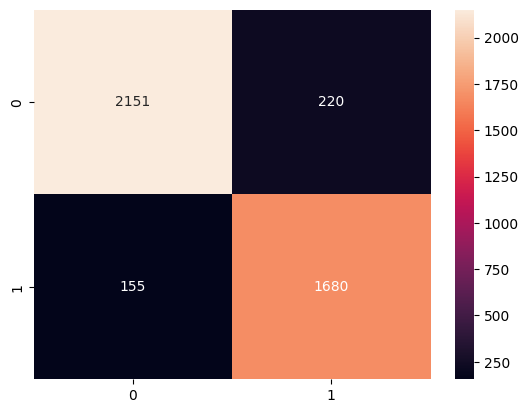

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [64]:
print(classification_report(y_test,y_pred
                            ))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2371
         1.0       0.88      0.92      0.90      1835

    accuracy                           0.91      4206
   macro avg       0.91      0.91      0.91      4206
weighted avg       0.91      0.91      0.91      4206



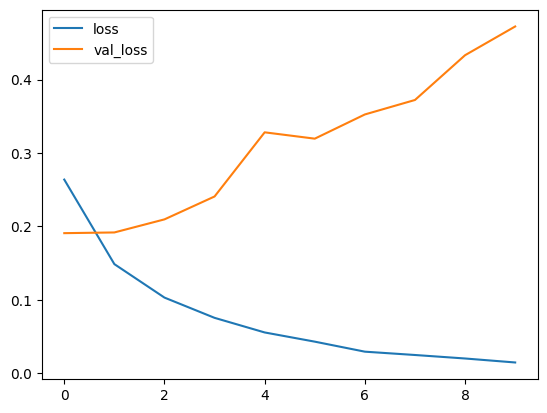

In [65]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

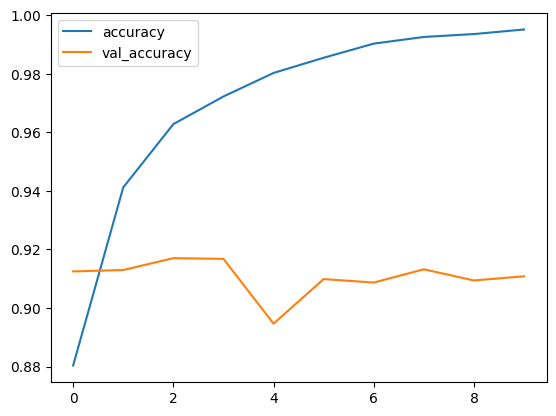

In [66]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()